In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from PIL import Image
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

male_images = []
female_images = []

image_width = 120
image_height = 120
BATCH_SIZE = 32



2.12.0


In [5]:
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('dataset/Gender',
                                              target_size=(image_width, image_height),
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('dataset',
                                                   target_size=(image_width, image_height),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
                                                   subset='validation')

Found 1847 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


2024-04-10 00:37:43.826274: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [7]:
# This part trains the AI Model with Gender Folder Having the male and female Images
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // 32)


Epoch 1/10


2024-04-10 00:37:48.833694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


57/57 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.5846

2024-04-10 00:38:42.546272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


57/57 [==============================] - 58s 986ms/step - loss: 0.6800 - accuracy: 0.5846 - val_loss: 0.5785 - val_accuracy: 0.7042
Epoch 2/10
57/57 [==============================] - 59s 1s/step - loss: 0.4795 - accuracy: 0.7802 - val_loss: 0.3804 - val_accuracy: 0.8354
Epoch 3/10
57/57 [==============================] - 58s 1s/step - loss: 0.3802 - accuracy: 0.8325 - val_loss: 0.4472 - val_accuracy: 0.7771
Epoch 4/10
57/57 [==============================] - 63s 1s/step - loss: 0.3043 - accuracy: 0.8766 - val_loss: 0.4629 - val_accuracy: 0.7792
Epoch 5/10
57/57 [==============================] - 63s 1s/step - loss: 0.2663 - accuracy: 0.8920 - val_loss: 0.2611 - val_accuracy: 0.8833
Epoch 6/10
57/57 [==============================] - 56s 987ms/step - loss: 0.2472 - accuracy: 0.9025 - val_loss: 0.2065 - val_accuracy: 0.9271
Epoch 7/10
57/57 [==============================] - 56s 973ms/step - loss: 0.2284 - accuracy: 0.9036 - val_loss: 0.3331 - val_accuracy: 0.8979
Epoch 8/10
57/57 [====

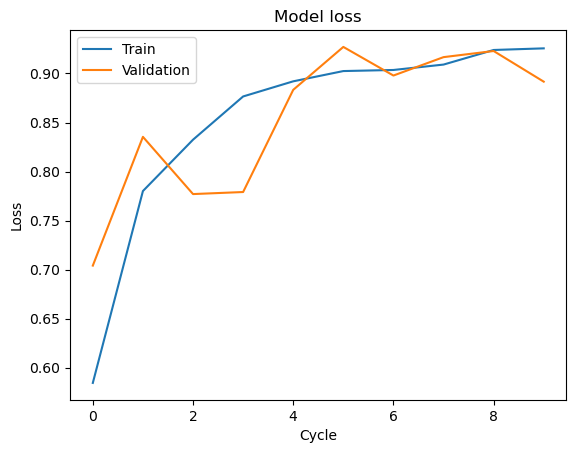

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Cycle')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Cycle')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [9]:
# This code takes new dataset and provide the prediction based on what it has been trained on.
# It also puts all detected images, into an array which can be be displayed in a tabular manner 

import os
import numpy as np
from tensorflow.keras.preprocessing import image

folder_path = 'dataset/images'

image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

data = []

for img_path in image_files:
    img_name = os.path.basename(img_path)  # Extracting image name from the path
    img = image.load_img(img_path, target_size=(image_width, image_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    female = 'yes' if prediction[0][0] >= 0.5 else 'no'
    male = 'yes' if prediction[0][0] < 0.5 else 'no'

    data.append([img_path, img_name, female, male])

df = pd.DataFrame(data, columns=['Image Path', 'Image Name', 'Female (yes/no)', 'Male (yes/no)'])

print(df)
#     prediction = model.predict(img_array)
#     if prediction[0][0] >= 0.5:
#         print(f"{img_path}: The Image has a Female Face")
#     else:
#         print(f"{img_path}: The Image has a Male Face")

1/1 [==============================] - 0s 41ms/step
                    Image Path  Image Name Female (yes/no) Male (yes/no)
0    dataset/images/000005.jpg  000005.jpg              no           yes
1    dataset/images/000008.jpg  000008.jpg             yes            no
2    dataset/images/000086.jpg  000086.jpg              no           yes
3    dataset/images/000033.jpg  000033.jpg              no           yes
4    dataset/images/000083.jpg  000083.jpg             yes            no
..                         ...         ...             ...           ...
100  dataset/images/000052.jpg  000052.jpg              no           yes
101  dataset/images/000035.jpg  000035.jpg             yes            no
102  dataset/images/000024.jpg  000024.jpg              no           yes
103  dataset/images/000092.jpg  000092.jpg              no           yes
104  dataset/images/000067.jpg  000067.jpg              no           yes

[105 rows x 4 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

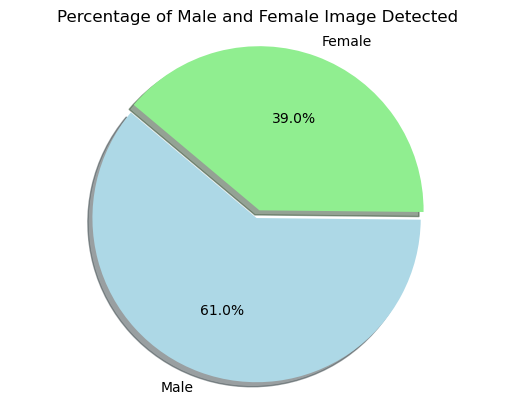

In [10]:
males_count = df['Male (yes/no)'].value_counts()['yes']
females_count = df['Female (yes/no)'].value_counts()['yes']

labels = ['Male', 'Female']
sizes = [males_count, females_count]
colors = ['lightblue', 'lightgreen']
explode = (0.05,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Percentage of Male and Female Image Detected')
plt.show



In [27]:
from IPython.display import display

display(df)

,Image Path,Image Name,Female (yes/no),Male (yes/no)
0,dataset/images/face-813.jpg,face-813.jpg,yes,no
1,dataset/images/face-1629.jpg,face-1629.jpg,yes,no
2,dataset/images/face-1579.jpg,face-1579.jpg,no,yes
3,dataset/images/face-616.jpg,face-616.jpg,no,yes
4,dataset/images/face-820.jpg,face-820.jpg,no,yes
...,...,...,...,...
2302,dataset/images/face-89.jpg,face-89.jpg,no,yes
2303,dataset/images/face-1375.jpg,face-1375.jpg,yes,no
2304,dataset/images/face-1171.jpg,face-1171.jpg,yes,no
2305,dataset/images/face-418.jpg,face-418.jpg,yes,no
